# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
target = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255)

In [4]:
train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=target, 
                                                       directory='/datasets/faces/final_files',
                                                       x_col='file_name',
                                                       y_col='real_age',
                                                       target_size=(300,300), 
                                                       batch_size=32, 
                                                       class_mode='raw',
                                                       subset='training',
                                                       seed=12345
                                                      )
valid_datagen_flow = train_datagen.flow_from_dataframe(dataframe=target, 
                                                       directory='/datasets/faces/final_files',
                                                       x_col='file_name',
                                                       y_col='real_age',
                                                       target_size=(300,300), 
                                                       batch_size=32, 
                                                       class_mode='raw',
                                                       subset='validation',
                                                       seed=12345
                                                      )

Found 5694 validated image filenames.
Found 1897 validated image filenames.


In [5]:
#Получение размера трейновой выборки 

train_images, train_labels = next(train_datagen_flow)
print(f"Количество изображений в тренировочной выборке: {train_datagen_flow.samples}")
print(f"Размер первого батча трейновой выборки изображений: {train_images.shape}")
print(f"Размер первого батча трейновой выборки меток: {train_labels.shape}")
print(f"")
#Получение размера валидационной выборки

valid_images, valid_labels = next(valid_datagen_flow)
print(f"Количество изображений в трейновой выборке: {valid_datagen_flow.samples}")
print(f"Размер первого батча трейновой выборки изображений: {valid_images.shape}")
print(f"Размер первого батча трейновой выборки меток: {valid_labels.shape}")

Количество изображений в тренировочной выборке: 5694
Размер первого батча трейновой выборки изображений: (32, 300, 300, 3)
Размер первого батча трейновой выборки меток: (32,)

Количество изображений в трейновой выборке: 1897
Размер первого батча трейновой выборки изображений: (32, 300, 300, 3)
Размер первого батча трейновой выборки меток: (32,)


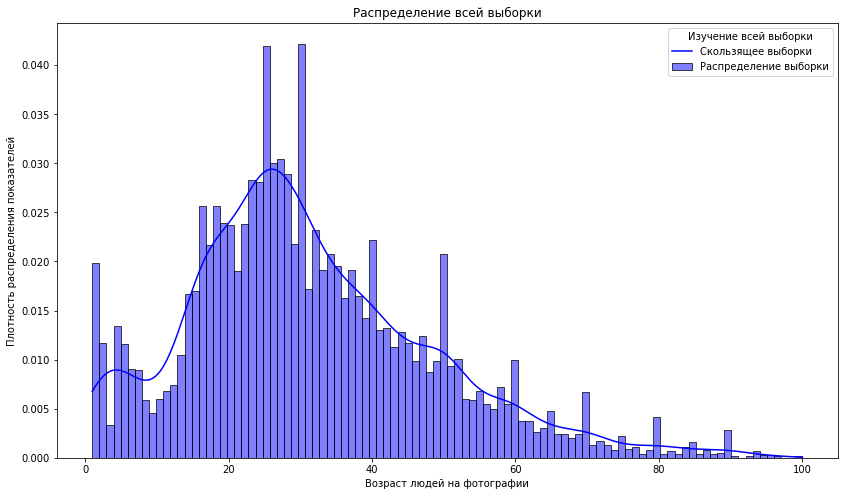

In [6]:
plt.figure(figsize=(14,8))
sns.histplot(data = target.real_age, color='blue', stat = 'density', bins = 100, kde=True)
plt.legend(title = 'Изучение всей выборки', labels = ['Скользящее выборки', 'Распределение выборки'])
plt.xlabel('Возраст людей на фотографии')
plt.ylabel('Плотность распределения показателей')
plt.title('Распределение всей выборки')
plt.show()

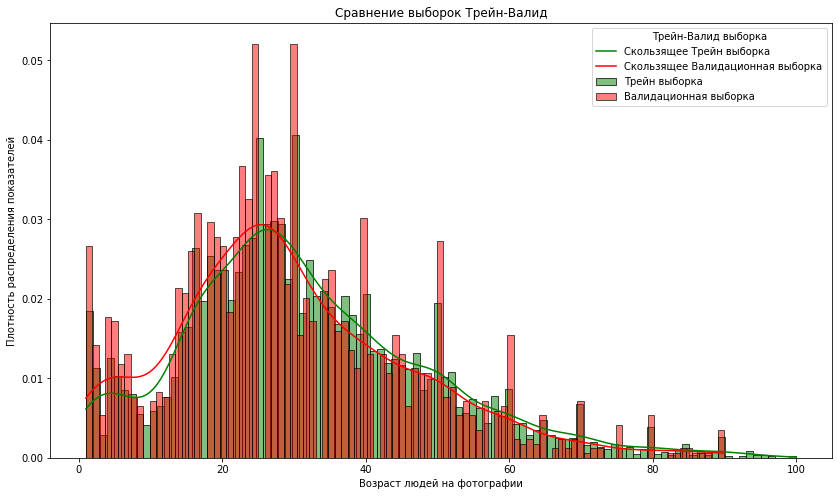

In [7]:
plt.figure(figsize=(14,8))
sns.histplot(data = train_datagen_flow.labels, color='green', stat = 'density', bins = 100, kde=True)
sns.histplot(data = valid_datagen_flow.labels, color='red', stat = 'density', bins = 100, kde=True )
plt.legend(title = 'Трейн-Валид выборка', labels = ['Скользящее Трейн выборка', 'Скользящее Валидационная выборка', 'Трейн выборка', 'Валидационная выборка'])
plt.xlabel('Возраст людей на фотографии')
plt.ylabel('Плотность распределения показателей')
plt.title('Сравнение выборок Трейн-Валид')
plt.show()

In [8]:
def EDA (df, color = 'green'): 
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    plt.figure(figsize=(14,8))
    sns.histplot(data = df, color=color, bins = 100, kde=True, ax=axes[0])
    axes[0].set_title(f'Гистограмма распределния возраста')
    
    
    sns.boxplot (df, orient = 'h', ax=axes[1], color=color)
    axes[1].set_title(f'Боксплот распределния возраста')

    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


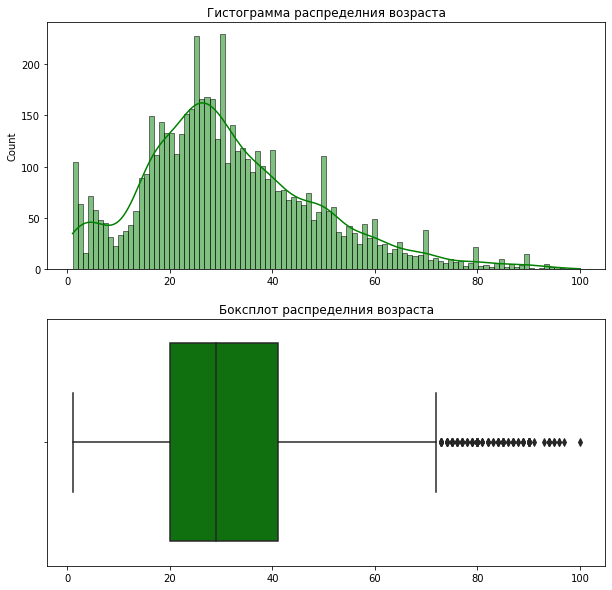

<Figure size 1008x576 with 0 Axes>

In [9]:
EDA(train_datagen_flow.labels)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


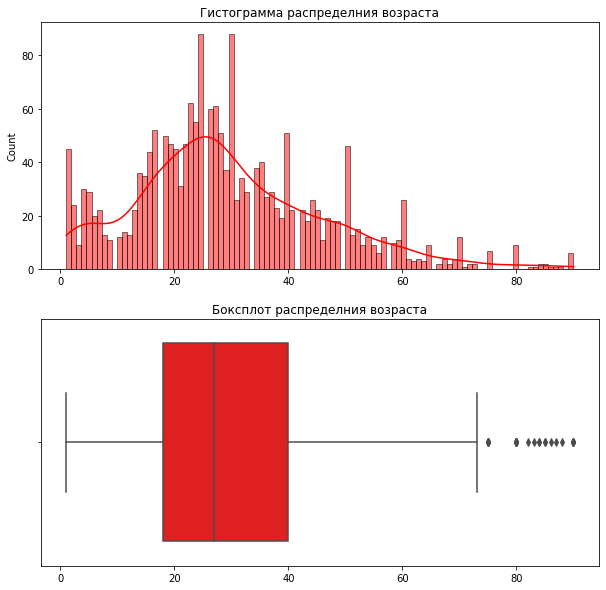

<Figure size 1008x576 with 0 Axes>

In [10]:
EDA(valid_datagen_flow.labels, 'red')

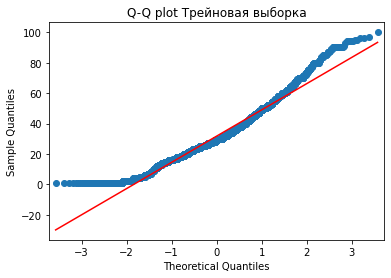

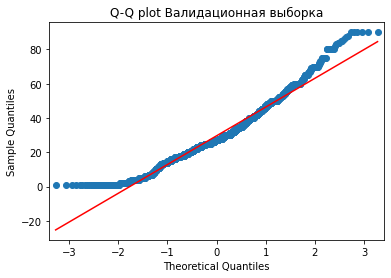

In [11]:
#Проверим нормальность распределения

sm.qqplot(train_datagen_flow.labels, line='s')
plt.title('Q-Q plot Трейновая выборка')
plt.show()

sm.qqplot(valid_datagen_flow.labels, line='s')
plt.title('Q-Q plot Валидационная выборка')
plt.show()

Возраст человека на фотографии снизу - 27


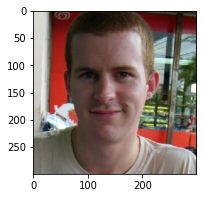

Возраст человека на фотографии снизу - 19


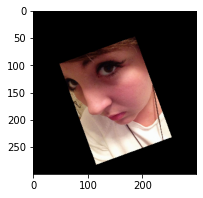

Возраст человека на фотографии снизу - 27


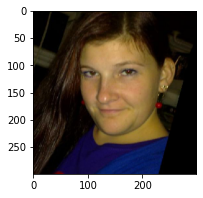

Возраст человека на фотографии снизу - 6


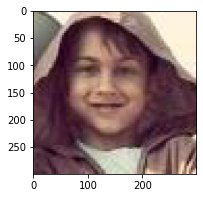

Возраст человека на фотографии снизу - 47


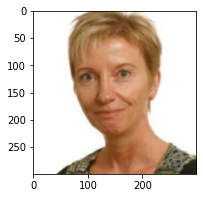

Возраст человека на фотографии снизу - 25


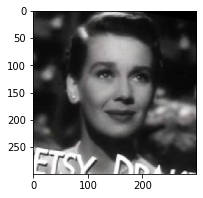

Возраст человека на фотографии снизу - 38


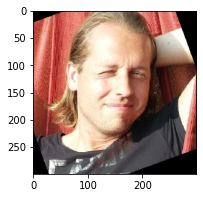

Возраст человека на фотографии снизу - 50


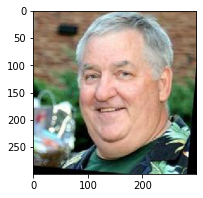

Возраст человека на фотографии снизу - 52


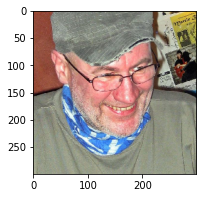

Возраст человека на фотографии снизу - 7


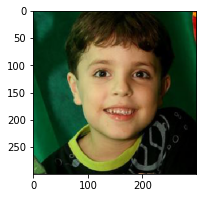

Возраст человека на фотографии снизу - 40


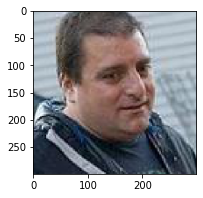

Возраст человека на фотографии снизу - 50


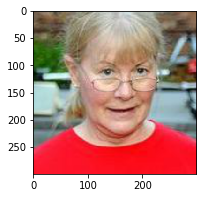

Возраст человека на фотографии снизу - 30


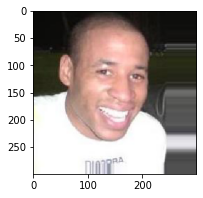

Возраст человека на фотографии снизу - 60


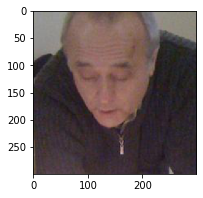

Возраст человека на фотографии снизу - 2


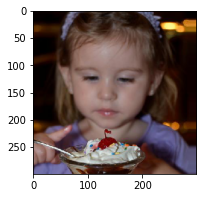

Возраст человека на фотографии снизу - 39


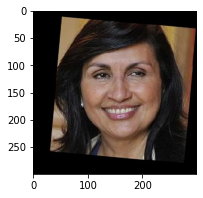

Возраст человека на фотографии снизу - 55


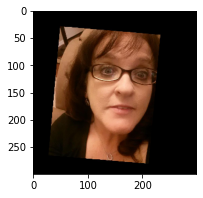

Возраст человека на фотографии снизу - 65


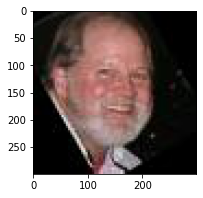

Возраст человека на фотографии снизу - 51


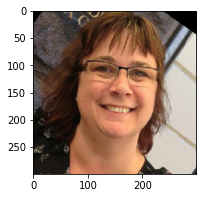

Возраст человека на фотографии снизу - 50


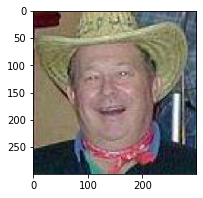

Возраст человека на фотографии снизу - 10


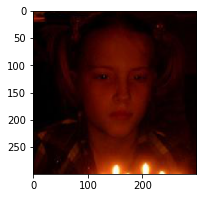

Возраст человека на фотографии снизу - 40


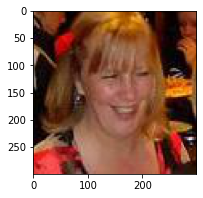

Возраст человека на фотографии снизу - 1


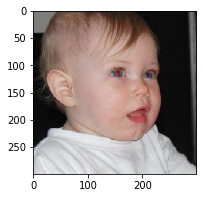

Возраст человека на фотографии снизу - 17


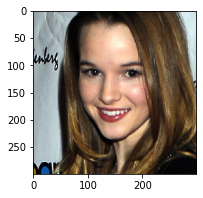

Возраст человека на фотографии снизу - 30


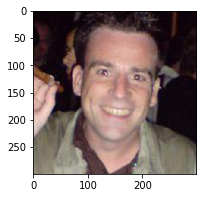

Возраст человека на фотографии снизу - 35


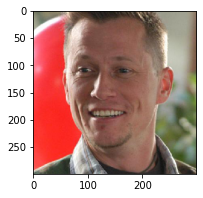

Возраст человека на фотографии снизу - 61


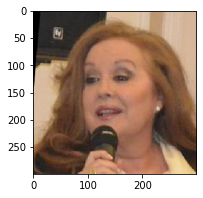

Возраст человека на фотографии снизу - 25


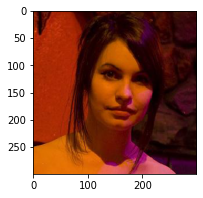

Возраст человека на фотографии снизу - 48


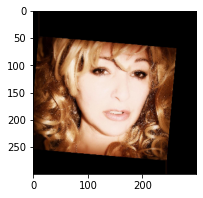

Возраст человека на фотографии снизу - 37


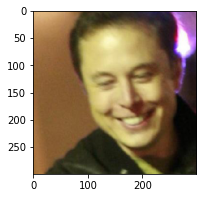

Возраст человека на фотографии снизу - 43


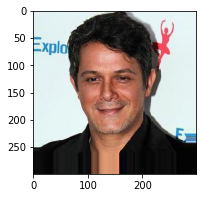

Возраст человека на фотографии снизу - 90


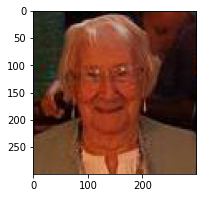

In [12]:
for i in range(len(train_labels)):
    print(f'Возраст человека на фотографии снизу - {train_labels[i]}')
    plt.figure(figsize=(3,3))
    plt.imshow(train_images[i])
    plt.show()

<div style = 'border: solid blue; padding: 20px'>
    
    Результаты проведенного исследовательского анализа: 
    1. В трейновой выборке количество изображений = 5694
    2. В валидационной выборке количество изображений = 1897
    3. Согласно гистограммам распрделения пик количества людей в выборках лежит в интервале от 20 до 35 лет. Наблюдается ненормальность распределений (графики Q-Q, гистограммы). 
    4. Согласно изученным фотографиям делаем вывод что некоторые изображения имеют хорошее качество, некоторые плохое. Кроме того, не все изображения расположены по нужной оси. При обучении необходимо применять методы аугментации что возможно улучшит качество модели

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
import pandas as pd

def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, 
        rescale=1./255,
        horizontal_flip=True,  
        rotation_range=20,     
        width_shift_range=0.2, 
        height_shift_range=0.2 
    )
    labels = pd.read_csv(path + 'labels.csv')
   
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(300, 300),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    

    return train_datagen_flow

def load_test(path):
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(300, 300),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_datagen_flow


def create_model(input_shape=(224, 224, 3)):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(
        optimizer=optimizer, loss="mae", metrics=["mae"]
    )

    return model


def train_model(
    model,
    train_data,
    test_data,
    batch_size=None,
    epochs=10,
    steps_per_epoch=None,
    validation_steps=None,
):

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2,
        shuffle=True,
    )

    return model


```

```
Train for 178 steps, validate for 60 steps
Epoch 1/10
2024-10-19 18:02:54.093701: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-10-19 18:02:55.044060: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 190s - loss: 11.4972 - mae: 11.4988 - val_loss: 15.5288 - val_mae: 15.5073
Epoch 2/10
178/178 - 183s - loss: 7.8637 - mae: 7.8639 - val_loss: 16.0148 - val_mae: 15.9974
Epoch 3/10
178/178 - 182s - loss: 7.0976 - mae: 7.0983 - val_loss: 12.2056 - val_mae: 12.1717
Epoch 4/10
178/178 - 177s - loss: 6.5863 - mae: 6.5871 - val_loss: 8.9182 - val_mae: 8.8720
Epoch 5/10
178/178 - 192s - loss: 6.1167 - mae: 6.1172 - val_loss: 7.4020 - val_mae: 7.3892
Epoch 6/10
178/178 - 184s - loss: 5.8777 - mae: 5.8781 - val_loss: 6.2128 - val_mae: 6.2461
Epoch 7/10
178/178 - 176s - loss: 5.5417 - mae: 5.5421 - val_loss: 6.6791 - val_mae: 6.7219
Epoch 8/10
178/178 - 181s - loss: 5.3842 - mae: 5.3842 - val_loss: 6.4851 - val_mae: 6.5253
Epoch 9/10
178/178 - 167s - loss: 5.1651 - mae: 5.1657 - val_loss: 6.0758 - val_mae: 6.1053
Epoch 10/10
178/178 - 170s - loss: 4.8931 - mae: 4.8935 - val_loss: 7.0713 - val_mae: 7.1067
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 14s - loss: 7.0713 - mae: 7.1067

```

## Анализ обученной модели

1. Качество модели достигнуто, при необходимости можно применить методы аугментации для улучшения показателей
2. метрика полученная на кросс-валидации прошла границу
3. Метрика и лосс функция постепенно снижается = > что модель учится 
4. Использованная архитектура ResNet 50.
5. Размер батча - 32, кол-во эпох 10 
6. На последней эпохе наблюдалось переобучение. разумно сократить до 9